In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Goal
 calculate the probability that a female has a height between 66.0 and 70.0 inches.


In [2]:
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

#define a variable for our data
data = females['Height']
data.head()

5000    58.910732
5001    65.230013
5002    63.369004
5003    64.479997
5004    61.793096
Name: Height, dtype: float64

## Plot the probability distribution and visualize the range we are interested in.


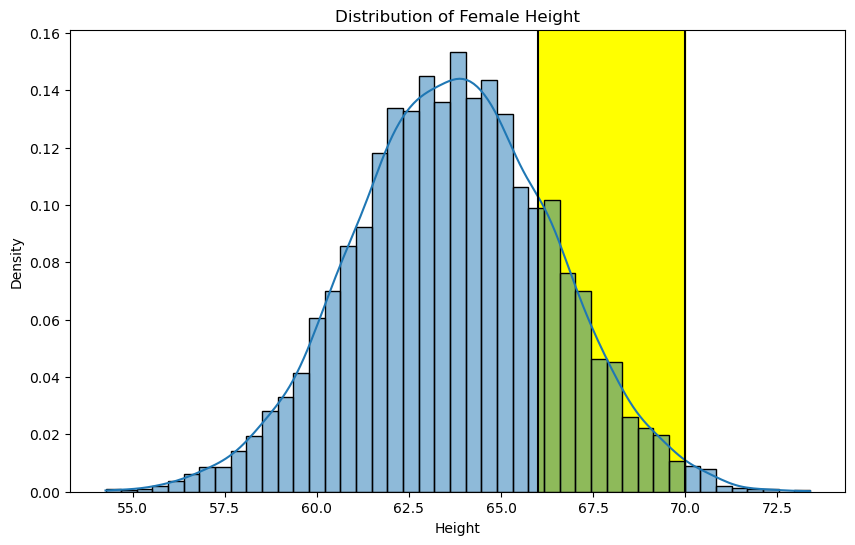

In [3]:
#define range
low_end = 66.0
high_end = 70.0

## Plot the probability distribution with a KDE line and annotate the mean.
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

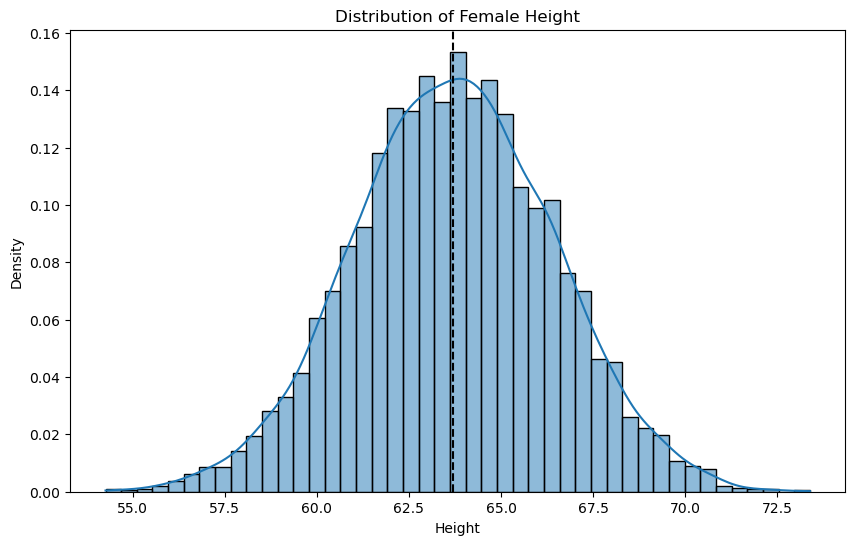

In [4]:
#To find the area under the curve would take a bit of calculus, 
#but we have a less math-intensive strategy using the cumulative probability distribution.  

mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

fig,ax = plt.subplots(figsize=(10,6))
# at hisplot, default cumulative=False
sns.histplot(x=data, stat='density',kde=True,cumulative=False)
ax.set_title('Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

## Introducing Cumulative Distribution Plots (CDF)

- First, all of the values are sorted from lowest to highest, and we keep adding one value at a time to our total.
- The CDF is like a running total of the % of the distribution that occurs to the left of each x value.

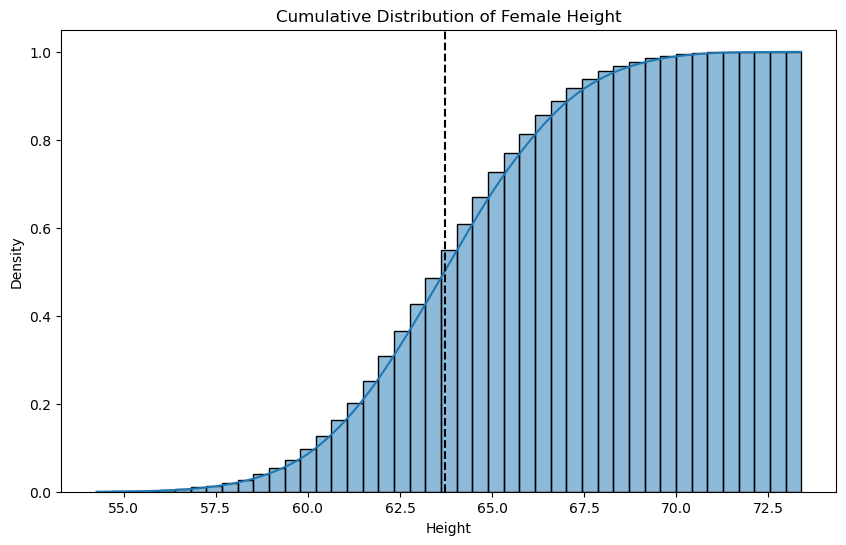

In [5]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True,cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean,color='k',ls='--');

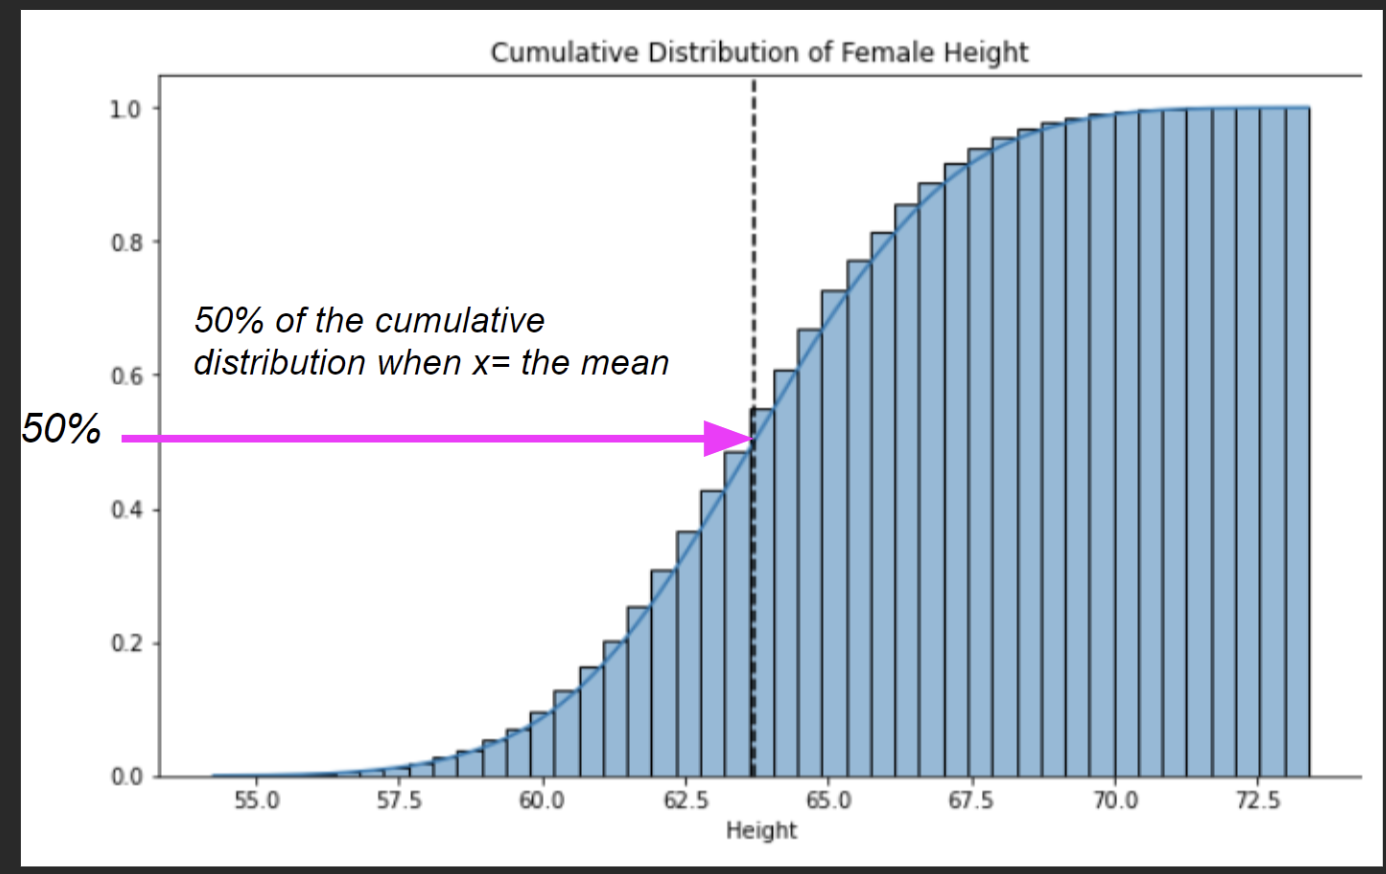

- At the minimum height (54.26313333), the cumulative probability is nearly 0.

- As we increase x to add the next tallest people, the cumulative probability increases.

- By definition, we have 50% of the cumulative distribution when x= our mean of 63.71.

- As above-average heights are included, the cumulative distribution continues to increase beyond 50%

- At the tallest height (73.38958587), the cumulative probability includes everyone and is 1 (100% of the people)

- Notice that the Cumulative Distribution will always sum up to one as we move from left to right on our x-axis.  

## Making the normal pdf and cdf

While the height data is pretty close to being normal, before we can do our calculations, we will create the pdf and cdf for the normal curve that has the same mean and standard deviation as our data.
When using creating the pdf function/curve for any normal distribution, we will use stats.norm.pdf. It accepts the following parameters:

- x: range and spacing of x 
- loc: the mean (defaults to 0)
- scale: the standard deviation. (default =1 )

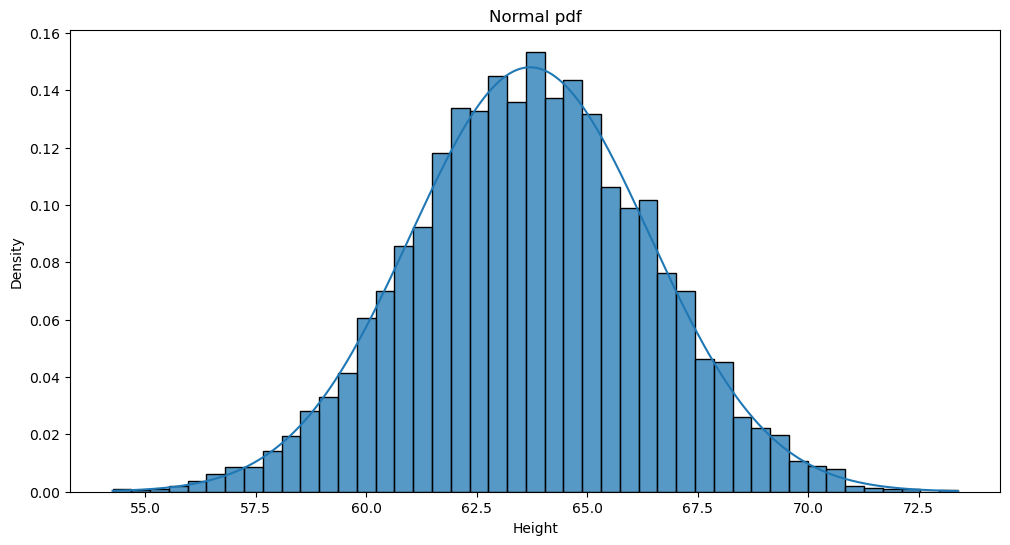

In [7]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)
pdf = stats.norm.pdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density')
ax.plot(x_range,pdf)
ax.set_title('Normal pdf');